In [3]:
import gwstools

vel = gwstools.gws_velocities(35.)

print vel['coordinates'][:10]


[[0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0], [0.0, -90.0, 12.0, 3.96, 802.0]]


In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

recon_time = 70.
cs = gwstools.gws_coastlines(recon_time)

# cs is a geojson object, uncomment the next line to see the contents
#print cs


/Users/Simon/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


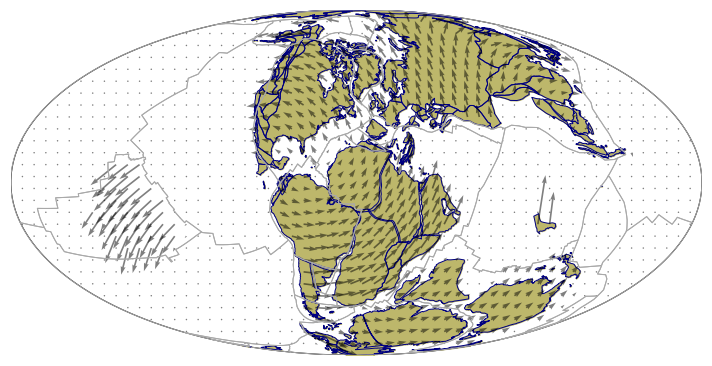

In [5]:
import gwsbasemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

recon_time = 135.

fig = plt.figure(figsize=(12,6))
ax_map = fig.add_axes([0,0,0.8,1.0])
m = Basemap(resolution='c',projection='moll',lon_0=0.,ax=ax_map)
m.drawmapboundary()

gwsbasemap.gws_plot_polygons(gwstools.gws_plate_polygons(recon_time),m,ax_map,color='',edgecolor='darkgray',zorder=2)
gwsbasemap.gws_plot_polygons(gwstools.gws_coastlines(recon_time),m,ax_map,color='darkkhaki')
gwsbasemap.gws_plot_polygons(gwstools.gws_coastlines(recon_time),m,ax_map,color='',edgecolor='navy')

gwsbasemap.gws_plot_vectors(gwstools.gws_velocities(recon_time,velocity_type='east_north'),
                            m,ax_map,scale=2000,alpha=0.5)

plt.show()



In [12]:
# current cell is not working, motion path service needs updating on server....

recon_time = 80
seedpoints = '75,25,85,25'
time_min = 0
time_max = 100
time_step = 2
fixplate = 0
movplate = 501

mp = gwstools.gws_motion_path(recon_time,seedpoints,fixplate,movplate,time_min,time_max,time_step,
                             url='http://127.0.0.1:8000')

print mp

{u'type': u'FeatureCollection', u'features': [{u'geometry': {u'distance': [33.23, 33.24, 33.25, 33.25, 33.26, 26.42, 94.85, 95.18, 85.51, 84.29], u'type': u'Polyline', u'coordinates': [[[53.52, -28.43], [53.71, -28.19], [53.9, -27.94], [54.1, -27.7], [54.29, -27.45], [54.47, -27.2], [54.33, -27.4], [54.34, -26.55], [54.3, -25.69], [54.61, -24.98], [55.01, -24.31]]]}, u'type': u'Feature'}, {u'geometry': {u'distance': [33.19, 33.18, 33.16, 33.15, 33.14, 25.95, 168.55, 169.53, 117.85, 100.6], u'type': u'Polyline', u'coordinates': [[[61.82, -34.07], [62.01, -33.82], [62.19, -33.56], [62.37, -33.3], [62.55, -33.04], [62.72, -32.78], [62.59, -32.99], [63.02, -31.52], [63.31, -30.01], [63.72, -29.02], [64.14, -28.19]]]}, u'type': u'Feature'}]}


In [10]:
import gwsFeatureCollection

tmp = gwsFeatureCollection.FeatureCollection(layer='plate_polygons',url='http://127.0.0.1:8000')

tmp


<Response [200]>
